**Problem Statement**

The problem that we are going to solve here is that given a set of features that describe a tumour whether it is Malignant or Benign, our machine learning model must predict whether the tumour is Malignant or Benign. To train our machine learning model with tumour data, we will be using [SCLCData](https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/wbcd.csv)



In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/wbcd.csv")
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,911320502,B,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,...,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
565,898677,B,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,...,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
566,873885,M,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,...,17.80,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
567,911201,B,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,...,15.80,16.93,103.10,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810


In [3]:
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [4]:
data.isnull().sum()

id                   0
diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

In [5]:
X = data.drop(['id','diagnosis'],axis=1)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [6]:
X.shape

(569, 30)

In [7]:
y = data.diagnosis
y.head()

0    B
1    B
2    B
3    B
4    B
Name: diagnosis, dtype: object

In [8]:
# Preparing training and testing data
# Storing 70% of the data(569  rows) into training and remaining 30% of the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=2)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 30)
(171, 30)
(398,)
(171,)


In [10]:
# Before Splitting if you apply standardization--> you are considering whole
# you are including test data also into training data

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_train


array([[ 0.0654828 , -1.35518629,  0.03134589, ..., -0.04689041,
         0.3683001 , -1.22806684],
       [-0.77639967, -0.1225787 , -0.77192193, ..., -0.39868555,
         0.3648074 , -0.83648993],
       [-0.84936282, -1.05782571, -0.87563499, ..., -1.03880764,
        -1.65746674, -0.54459715],
       ...,
       [-0.88303812, -0.35998755, -0.85204535, ..., -0.1993652 ,
        -0.98162901, -0.01313199],
       [ 1.07854805,  0.213151  ,  0.91351698, ...,  0.10120204,
         3.54665843, -1.20658794],
       [-0.26846391, -0.90674734, -0.26149099, ..., -0.22037015,
         1.74267813,  0.1823811 ]])

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Scaling for training data
scaled_X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
scaled_X_train


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,0.065483,-1.355186,0.031346,-0.035592,0.240960,-0.482979,-0.357708,-0.046272,1.043490,-1.165341,...,0.125178,-1.425939,0.117536,0.004168,-0.067496,-0.603330,-0.480560,-0.046890,0.368300,-1.228067
1,-0.776400,-0.122579,-0.771922,-0.735368,0.647407,-0.311306,-0.538400,-0.554964,0.487938,-0.040111,...,-0.762720,-0.388938,-0.811034,-0.683149,0.750316,-0.570666,-0.484590,-0.398686,0.364807,-0.836490
2,-0.849363,-1.057826,-0.875635,-0.787151,0.348139,-0.852027,-0.784787,-0.557750,-0.867159,0.635322,...,-0.993986,-1.439473,-1.023193,-0.826151,-0.423640,-1.070632,-1.104405,-1.038808,-1.657467,-0.544597
3,-0.495772,1.855828,-0.430686,-0.494085,0.543011,0.675764,0.293648,-0.056654,0.547997,1.030554,...,-0.106089,2.370196,-0.140978,-0.177502,2.078160,1.517193,0.926643,0.515256,0.635492,2.064263
4,-0.540673,-1.208904,-0.589306,-0.538871,-1.270688,-1.348603,-0.942352,-1.083888,-0.465510,-0.868918,...,-0.684254,-1.498682,-0.738234,-0.623056,-1.368960,-1.264486,-1.095436,-1.409643,-0.974644,-1.247343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0.601481,0.093248,0.734561,0.453131,0.487333,1.735231,1.756211,1.116199,1.328773,0.501121,...,0.253200,-0.385555,0.465193,0.119998,0.284251,1.354538,1.668284,0.992779,0.815366,0.459404
394,1.594903,1.438564,1.572400,1.506153,0.410777,1.138790,2.148854,1.697561,1.520214,-0.184636,...,1.335196,1.395787,1.255592,1.250953,-0.164226,0.953898,1.555425,0.927800,0.792663,0.089857
395,-0.883038,-0.359988,-0.852045,-0.807025,0.088542,-0.065471,-0.416287,-0.505842,-0.668211,0.250414,...,-0.938234,0.199767,-0.891856,-0.806991,0.508490,0.053292,-0.233178,-0.199365,-0.981629,-0.013132
396,1.078548,0.213151,0.913517,0.918342,-0.805780,-0.659950,-0.158337,0.205162,1.246191,-1.789158,...,0.911896,0.423069,0.676164,0.679640,-1.056784,-0.818649,-0.169695,0.101202,3.546658,-1.206588


In [13]:
# Scaling for testing data
# Testing the data based on training data
scaled_X_test = pd.DataFrame(scaler.fit_transform(X_test),columns=X_test.columns)
scaled_X_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,-0.820383,-0.173809,-0.864054,-0.772484,-0.839113,-1.115846,-0.895059,-0.803603,0.581700,-0.557191,...,-0.867791,-0.052852,-0.896889,-0.798979,-1.019902,-1.079349,-1.007702,-0.923140,0.358435,-0.918749
1,-0.141927,-0.792820,-0.198179,-0.230883,-1.152495,-0.871458,-0.875741,-0.842076,0.091697,-0.935263,...,-0.349774,-0.954952,-0.300309,-0.418776,-1.077035,-0.417112,-0.746220,-0.800681,0.438508,-0.516902
2,1.127255,-0.621604,1.062181,0.984540,-0.660692,0.192327,0.150940,0.302088,-0.436534,-0.788529,...,0.807410,-0.679606,0.724717,0.699342,-0.382650,-0.081638,0.551709,0.505600,-0.249256,-0.219070
3,-0.981224,0.993971,-1.003433,-0.874237,-1.236369,-0.830667,-0.999770,-1.171264,0.453118,-0.064110,...,-0.727843,0.754930,-0.758478,-0.715669,-0.641946,-0.689611,-1.066559,-1.382204,0.061024,-0.559531
4,0.574547,-1.058424,0.501265,0.422529,-0.242850,-0.490922,-0.513499,-0.165548,-0.384406,-0.662945,...,0.249706,-1.050791,0.202296,0.080185,-0.633156,-0.637230,-0.321219,-0.128562,-0.340767,-0.908518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,-0.916888,-0.625994,-0.917171,-0.839925,0.729320,-0.615620,-0.815449,-0.720426,-0.457386,-0.048247,...,-0.857347,-0.007215,-0.877674,-0.777207,0.083204,-0.778482,-0.869224,-0.731329,-0.026197,-0.414593
167,-0.109758,-0.854282,-0.088121,-0.216093,0.195580,0.278202,-0.231850,-0.018971,-0.638096,0.250510,...,0.011585,-0.856071,0.034161,-0.163628,0.267788,0.433932,-0.114450,0.268179,-0.611011,0.960324
168,-0.694635,-0.531606,-0.732749,-0.666293,-0.553944,-0.896863,-0.839197,-0.948554,0.004817,-0.472587,...,-0.640114,-0.303858,-0.695427,-0.614186,-0.466152,-0.634876,-0.700811,-1.055439,-0.339337,-0.278182
169,2.215126,0.287157,2.328490,2.466473,-0.314523,1.496564,1.510580,1.555440,-0.433059,-0.241249,...,2.438746,0.257482,2.604231,2.664237,-0.343096,1.130187,1.220513,0.983564,-0.262125,0.140716


In [14]:
# Model Building
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6,metric='euclidean')
#knn = KNeighborsClassifier(n_neighbors=25,metric='euclidean')
#knn = KNeighborsClassifier(n_neighbors=40,metric='euclidean')
# Apply the knn object on the dataset
# Syntax: objectName.fit(Input,Output)
knn.fit(scaled_X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [15]:
# Predictions on the data
#predict function--> gives the predicted values
# Syntax:objectname.predict(Input)
y_train_pred = knn.predict(scaled_X_train)
y_train_pred

array(['B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M',
       'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B',
       'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M

In [16]:
# Check the accuracy, classification report
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           B       0.97      1.00      0.98       257
           M       1.00      0.94      0.97       141

    accuracy                           0.98       398
   macro avg       0.98      0.97      0.97       398
weighted avg       0.98      0.98      0.98       398



In [17]:
# Checking for optimum k-value
# Build the models with multiple k values
from sklearn.metrics import accuracy_score
scores =[]
for k in range(1,20):
    knn_model = KNeighborsClassifier(n_neighbors=k)#,metric='euclidean')
    knn_model.fit(scaled_X_train,y_train)
    pred_test = knn_model.predict(scaled_X_test)
    scores.append(accuracy_score(y_test,pred_test))
scores
    

[0.9473684210526315,
 0.9239766081871345,
 0.935672514619883,
 0.9298245614035088,
 0.9473684210526315,
 0.935672514619883,
 0.9473684210526315,
 0.9415204678362573,
 0.9473684210526315,
 0.9298245614035088,
 0.9415204678362573,
 0.9298245614035088,
 0.935672514619883,
 0.9239766081871345,
 0.9239766081871345,
 0.9239766081871345,
 0.9473684210526315,
 0.9239766081871345,
 0.935672514619883]

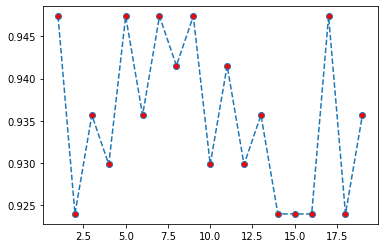

In [18]:
# Plot of K values and Scores
plt.plot(range(1,20),scores,marker='o',markerfacecolor='r',linestyle='--')

In [19]:
# Optimum k value is 7
final_model = KNeighborsClassifier(n_neighbors=7,metric='euclidean')
final_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [20]:
# Prediction on training data
final_train_pred = final_model.predict(scaled_X_train)
final_train_pred

array(['B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M',
       'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B',
       'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M

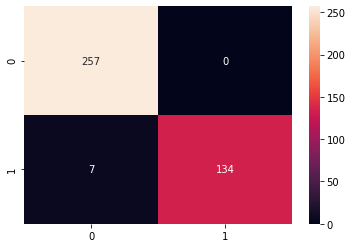

In [21]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_train,final_train_pred),annot=True,fmt='d')

In [22]:
# classification report
# Precision--> PPV --> Out of the positive predicted values,how many truely positive
print(classification_report(y_train,final_train_pred))

              precision    recall  f1-score   support

           B       0.97      1.00      0.99       257
           M       1.00      0.95      0.97       141

    accuracy                           0.98       398
   macro avg       0.99      0.98      0.98       398
weighted avg       0.98      0.98      0.98       398



In [23]:
# Prediction on Test Data
final_test_pred = final_model.predict(scaled_X_test) #y_test
final_test_pred

array(['B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M',
       'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M',
       'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'M', 'B'], dtype=object)

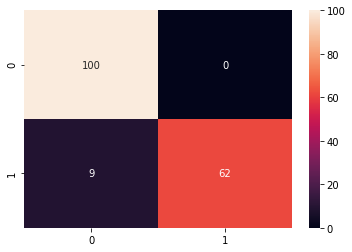

In [24]:
# Compare actual values of test data(y_test) and final_test_pred(model predicted values)
#Confusion_matrix(actualValues,predictedValues)
sns.heatmap(confusion_matrix(y_test,final_test_pred),annot=True,fmt='d')

In [25]:
print(classification_report(y_test,final_test_pred))

              precision    recall  f1-score   support

           B       0.92      1.00      0.96       100
           M       1.00      0.87      0.93        71

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



In [26]:
# Predict the probability of a tumour being Benign or Malignant
# Predict--> give you the predicted value(B or M)
# Predict_proba--> gives you the probability associated with B and probability associated with M
#Syntax: objectname.predict_proba(Input values)
#0 --> B and 1 --> M
y_test_prob=final_model.predict_proba(scaled_X_test)
y_test_prob=pd.DataFrame(y_test_prob)
y_test_prob

,0,1
0,1.000000,0.000000
1,1.000000,0.000000
2,0.428571,0.571429
3,1.000000,0.000000
4,1.000000,0.000000
...,...,...
166,1.000000,0.000000
167,0.857143,0.142857
168,1.000000,0.000000
169,0.000000,1.000000


In [27]:
y_test

528    B
291    B
467    M
108    B
340    B
      ..
2      B
25     M
52     B
386    M
476    B
Name: diagnosis, Length: 171, dtype: object

In [28]:
# Roc curve
## TPR,FPR,Threshold
from sklearn.metrics import roc_auc_score,roc_curve
m_prob = final_model.predict_proba(scaled_X_test)[:,1]
#m_prob
fpr,tpr,threshold = roc_curve(y_test,m_prob,pos_label='M')

In [29]:
tpr

array([0.        , 0.61971831, 0.73239437, 0.87323944, 0.94366197,
       0.97183099, 1.        ])

In [30]:
fpr

array([0.  , 0.  , 0.  , 0.  , 0.06, 0.16, 1.  ])

In [31]:
threshold

array([2.        , 1.        , 0.85714286, 0.57142857, 0.28571429,
       0.14285714, 0.        ])

In [32]:
pd.DataFrame(threshold)

,0
0,2.000000
1,1.000000
2,0.857143
3,0.571429
4,0.285714
5,0.142857
6,0.000000


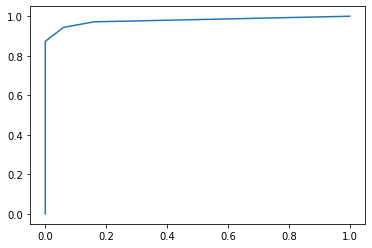

In [33]:
plt.plot(fpr,tpr)

In [34]:
roc_auc_score(y_test,m_prob)

0.9784507042253521

In [35]:
# KFold
#5 folds--> In each and every fold--> create a part of test data and remaining 
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)
kfold.get_n_splits(X,y)

5

Randomly shuffling the records

In [37]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=7,metric='euclidean')
# model will built for 5 times--> for loop
# some set of indices will be in test data()
##be in training data
# In each and every fold , it is splitting training data and testing data
score=[]
for train_index,test_index in kfold.split(X,y):
    X_train,X_test=X.iloc[train_index],X.iloc[test_index]
    y_train,y_test=y.iloc[train_index],y.iloc[test_index]
    
    #pass the X_train, y_train into the knn algorithm
    model_knn.fit(X_train,y_train)
    
    # predict the model on test data(X_test, y_test)
    y_pred_test = model_knn.predict(X_test)
    
    # accuracy score of predicted values(y_pred_test) and A.V(y_test)
    accuracy = accuracy_score(y_test,y_pred_test)
    
    score.append(accuracy)
print(score)
print('Average Score of the model: ',np.mean(score))

[0.9122807017543859, 0.9035087719298246, 0.956140350877193, 0.9473684210526315, 0.9469026548672567]
Average Score of the model:  0.9332401800962584
